# Monte Carlo Simulation for FE
## IEOR 4703

### Estimating credit exposure via simulation

We wish to estimate the following credit exposure:

$\sum Y_i e_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp
from time import time

In [2]:
np.random.seed(46712356)

In [3]:
# exposures to 16 names

exposures = np.array([5,       8,    9,   11,    3,    2,    2,    4,    7,    3,    4,    7,   15,   11,    4, 5])
defaultP  = np.array([0.10, 0.20, 0.10, 0.05, 0.15, 0.13, 0.10, 0.08, 0.06, 0.07, 0.05, 0.05, 0.02, 0.04, 0.09, 0.12])

totalExposure = sum(exposures)
print(totalExposure)

#threshold
C = 60

100


In [4]:
#hyperparameter
t = 0.4
defaultQ = (defaultP*np.exp(t*exposures)) / (defaultP*np.exp(t*exposures)+(1-defaultP))
print(np.sum(defaultQ*exposures))

t = 0.6
defaultQ = (defaultP*np.exp(t*exposures)) / (defaultP*np.exp(t*exposures)+(1-defaultP))
print(np.sum(defaultQ*exposures))

62.43981279119345
80.11255261585482


In [5]:
N = 100000
runningSum = 0
countP = 0
countQ = 0

m = len(defaultP)


for i in range(N):

    U = np.random.rand(m) # U~Uniform(0,1)

    indicatorP = U>1-defaultP
    indicatorQ = U>1-defaultQ

    #numerator   = prod((defaultP.^indicatorQ).*(1-defaultP).^(1-indicatorQ));
    #denominator = prod((defaultQ.^indicatorQ).*(1-defaultQ).^(1-indicatorQ));
    #disp([numerator denominator]);

    #likelihood = numerator/denominator
    likelihood = 1

    lossP = np.sum(indicatorP*exposures)
    lossQ = np.sum(indicatorQ*exposures)

    if lossP>C:
        countP = countP+1

    if lossQ>C:
        countQ = countQ+likelihood


    runningSum = runningSum+lossP

expectedLoss = runningSum/N
#
probP_L_greater_than_C = countP/N
probQ_L_greater_than_C = countQ/N

#exact solution
expectedLoss_exact = np.sum(defaultP*exposures)

print([expectedLoss, expectedLoss_exact])
#disp([probP_L_greater_than_C, probQ_L_greater_than_C]);

# Expectation of P(L > C) = E( indicator(L>C) )

[np.float64(7.68914), np.float64(7.66)]


In [6]:
sizeN = 4   # number of rows
sizeM = 4   # number of columns
nN = np.array([100, 1_000, 10_000, 100_000])
alpha = np.array([0.01, 0.05, 0.10, 0.50])
z = sp.stats.norm.ppf(1 - alpha/2)

theta_hat_vec = np.zeros(sizeN)
lb_mat = np.zeros([sizeN, sizeM])
ub_mat = np.zeros([sizeN, sizeM])

for i in range(sizeN):

    N = nN[i]
    U = np.random.rand(N) # U~Uniform(0,1)
    Y = np.exp(U)
    theta_hat = np.mean(Y)
    sig2_N = np.var(Y, ddof=1)

    theta_hat_vec[i] = theta_hat
    lb_mat[i] = theta_hat - z * np.sqrt(sig2_N / N)
    ub_mat[i] = theta_hat + z * np.sqrt(sig2_N / N)

### Plot the confidence intervals

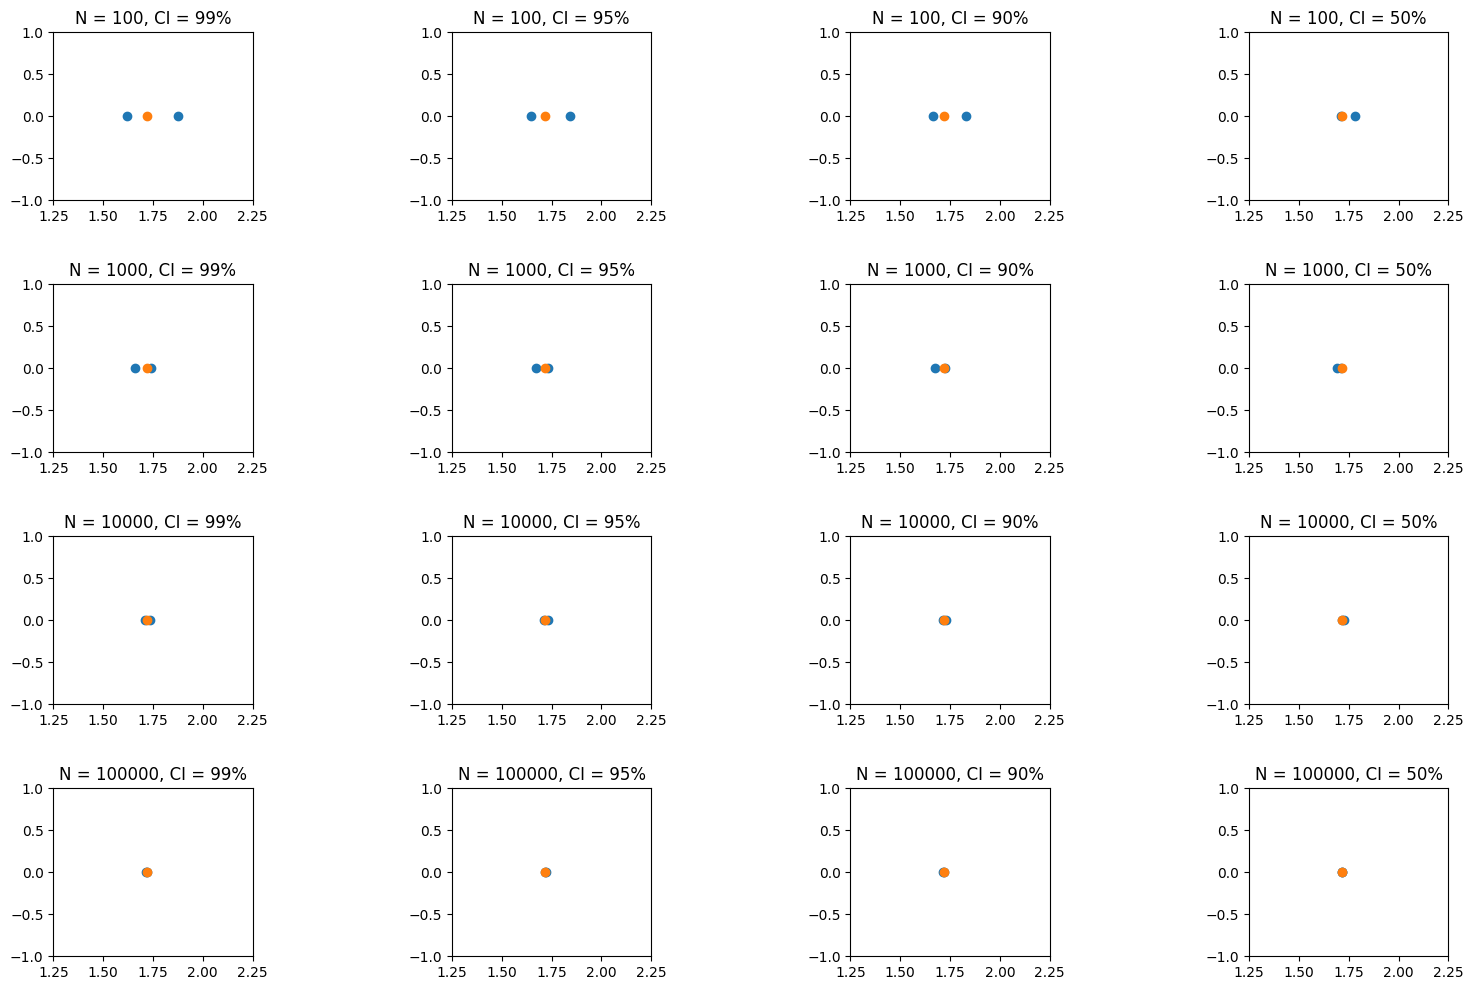

In [7]:
theta = np.e - 1

lowerB = 1.25
upperB = 2.25
boundY = 1.0

fig, axs = plt.subplots(sizeN, sizeM, figsize=(18,12))
fig.subplots_adjust(hspace = .5, wspace = 1)

for i in range(sizeN):
    for j in range(sizeM):
        axs[i, j].plot([lb_mat[i,j], ub_mat[i,j]], [0,0], 'o')
        axs[i, j].plot(theta, 0, 'o')
        axs[i, j].set_title('N = %i, CI = %2.0f%s' % (nN[i], 100*(1-alpha[j]), '%'))
        axs[i, j].set_xlim([lowerB, upperB])
        axs[i, j].set_ylim([-boundY, boundY])

plt.show()